## DEMO: Visualizing waves  

In [2]:
import numpy as np  
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
import scipy  
from scipy.constants import physical_constants, hbar, h, c, k, m_e, Rydberg, e, N_A

%matplotlib inline
%config InlineBackend.figure_format='retina'

### Standing and traveling waves in 1D

We begin by plotting a simple periodic function using numpy (np) and matplotlib.pyplot (plt) 

$$y = \sin(kx)=\sin\left(\frac{2\pi}{\lambda} x\right)$$

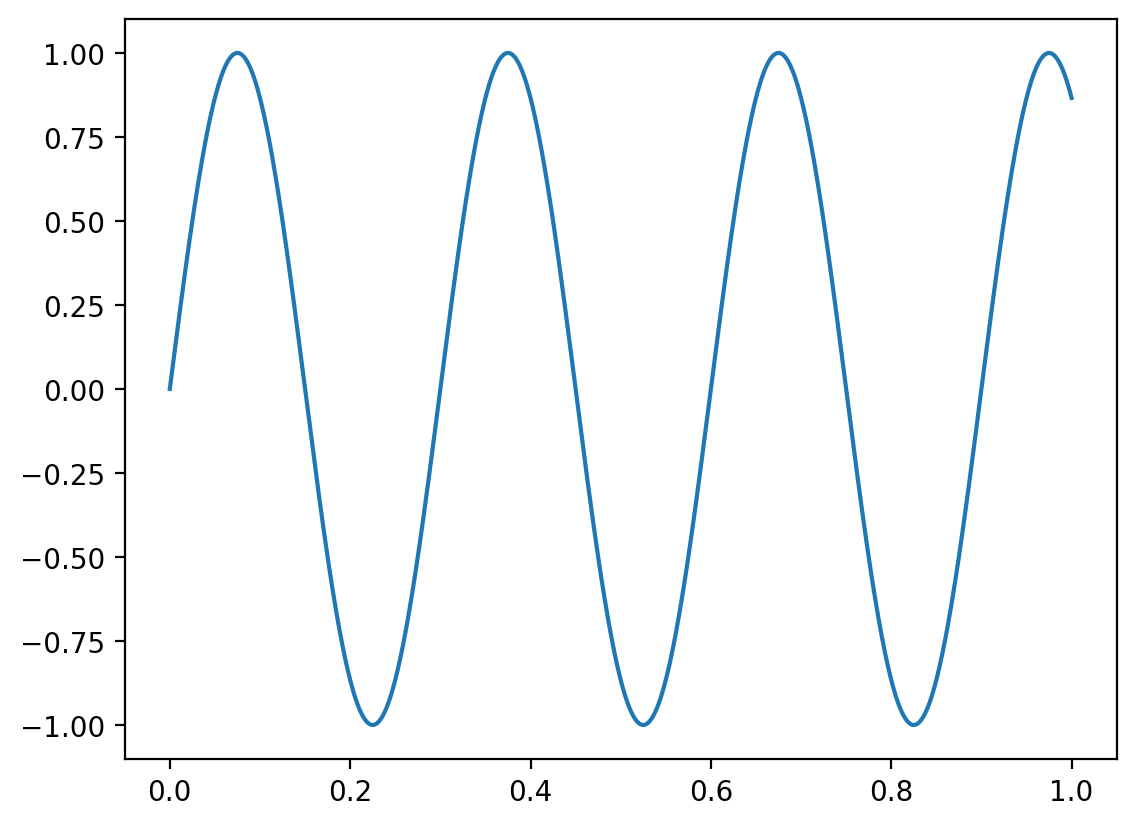

In [2]:
L=0.3            # Try different wavelengths

x = np.linspace(0.0, 1.0, 1000)

y = np.sin(2 * np.pi * x/L)

plt.plot(x, y)

**By putting above example inside a python function will make wavelength exploration convenient**

In [68]:
def wave(L=2):
    
    x = np.linspace(0.0, 1.0, 1000)
    y = np.sin(2*np.pi * x/L)

    plt.plot(x, y, label=f'L={L}')
    
    plt.xlabel('x')
    plt.xlabel('y')
    plt.legend()
    plt.title('Sine waves')
    plt.show()

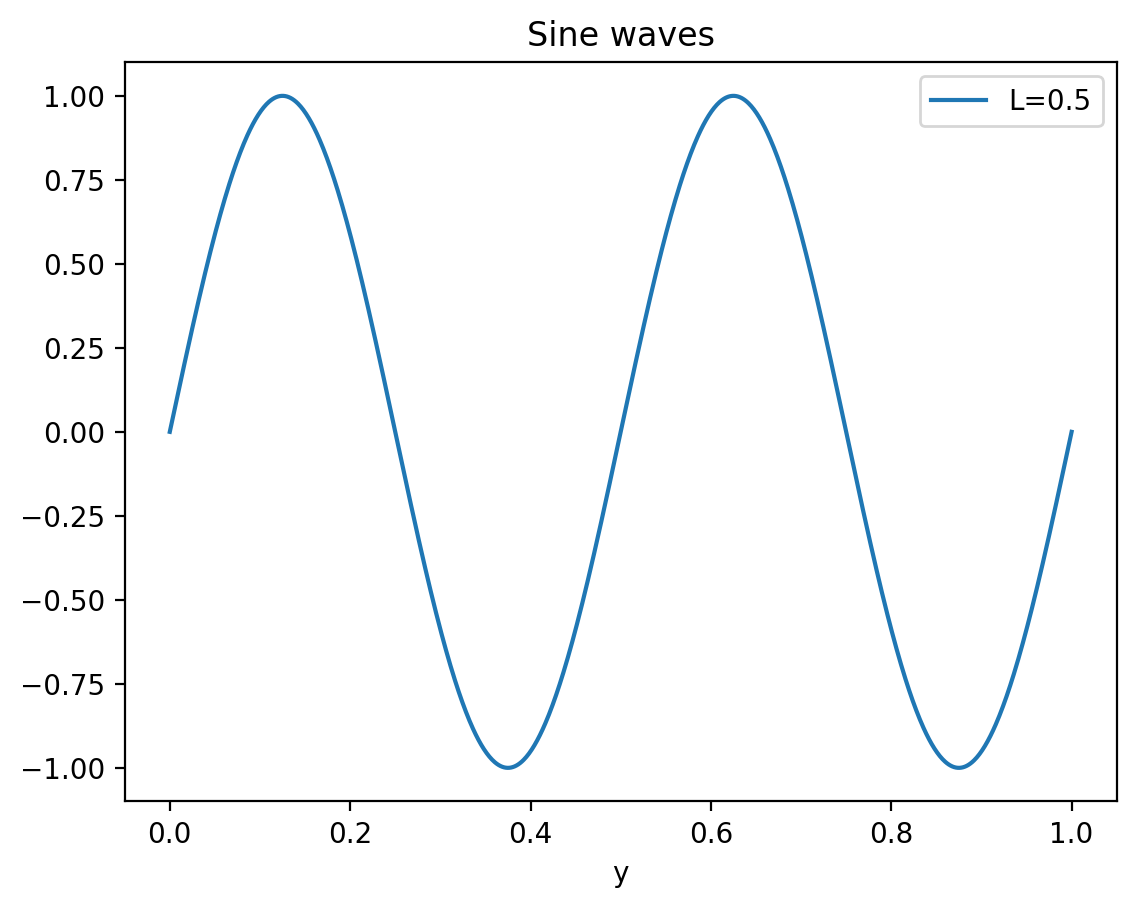

In [69]:
# Change wavelength
wave(L=0.5)

### Interact with waves

- By adding ``@widgets.interact(parameters=(init,final))`` to our functions we can interactively parameters in the function using slider widgets.

In [54]:
interactive(wave, L=(0.1, 2))

interactive(children=(FloatSlider(value=2.0, description='L', max=2.0, min=0.1), Output()), _dom_classes=('wid…

## Traveling, standing waves and wave interference 

In [59]:
def wavef2(k=10, t=0, phi=0, v=1):

    x     = np.linspace(0, 1., 1000)
    
    wave1 = np.sin(k*(x-v*t)) 
    wave2 = np.sin(k*(x-v*t)+phi)    #try flipping the direction of velocity to get standing wave
    
    plt.plot(x, wave1,   lw=2, color='blue')
    plt.plot(x, wave2,   lw=2,  color='green')
    plt.plot(x, wave1+wave2, lw=3,  color='red')
    
    plt.ylim([-2.5, 2.5])
    plt.legend(['Wave1','Wave2','Wave1+Wave2'])
    plt.grid('on')
    plt.show()

In [61]:
interactive(wavef2, k=(2, 20), t=(0,50.0,0.1), phi=(0, 2*np.pi, np.pi/8),v=1)

interactive(children=(IntSlider(value=10, description='k', max=20, min=2), FloatSlider(value=0.0, description=…

### Traveling wave as a function of time and position

In [73]:
import plotly.express as px

def wave_x_t(A = 1, k = 1.0, omega = 1, phi = 0):
    
    # Create a grid of x and t values
    x = np.linspace(0, 2 * np.pi, 50)
    t = np.linspace(0, 2 * np.pi, 50)
    X, T = np.meshgrid(x, t)

    # Calculate the wave amplitude for each combination of x and t
    Y = A * np.sin(k * X - omega * T + phi)

    return px.scatter_3d(x=X.ravel(), 
              y=T.ravel(), 
              z=Y.ravel(), 
              color = Y.ravel(),
              labels={'x': 'Position', 'y': 'Time', 'z': 'Amplitude'},
              width=1000, 
              height=1000)

In [78]:
wave_x_t(A=1, k = 1.0, omega=2, phi=0)

## Normal modes of 1D guitar string

In [90]:
def wavef(n=1):
    
    L=1
    
    x = np.linspace(0, +1., 1000)
    
    y = np.sin(n*np.pi * x/L)
    
    plt.plot(x, y, lw=3)
    plt.title(label=f'Normal mode # {n}')
    plt.grid('--')
    plt.show()

In [91]:
interactive(wavef, n=(1,20))

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

## 1D guitar vibrations as linear combination of normal modes

For simplicity we will combine two modes with two different mode numbers and shifted with resepct to each ophter by a phase $\phi$.  

$$Mode_1 = cos(\omega t) \cdot sin(n_1\pi  \cdot \frac{x}{L})$$

$$Mode_2 = cos(\omega t+\phi) \cdot sin(n_2\pi  \cdot \frac{x}{L})$$

In [27]:
def wavef(n1=1, n2=1, phi=0,t=0):
    
    L=1
    omega=1
     
    x = np.linspace(0, +1., 50)
    
    mode1 = np.cos(omega*t) * np.sin(n1*np.pi * x/L)
    
    mode2 = np.cos(omega*t + phi) * np.sin(n2*np.pi * x/L)
    
    plt.plot(x, mode1+mode2, lw=5, color='orange')
    plt.ylim([-2.5, 2.5])
    plt.grid('on')
    plt.show()

In [30]:
interactive(wavef, n1=(1,5), n2=(1,5), phi=(0,2*np.pi), t=(0,100,0.1) )

interactive(children=(IntSlider(value=1, description='n1', max=5, min=1), IntSlider(value=1, description='n2',…

## Normal modes of a 2D membrane

In [122]:
def membrane2d(n=1, m=1): 
    
    # Constants
    Lx, Ly = 1.0, 1.0  # Dimensions of the rectangular region
    c = 1.0            # Wave speed
    
    # Create a spatial grid
    Nx, Ny = 100, 100
    x, y  = np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny)
    X, Y  = np.meshgrid(x, y)

    # Compute spatial part of the normal mode
    spatial_part = np.sin(m * np.pi * X / Lx) * np.sin(n * np.pi * Y / Ly)
   
    plt.contourf(X, Y, spatial_part, 40, cmap='RdBu')
    plt.show()

In [123]:
interactive(membrane2d, n=(1,10), m=(1,10))

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), IntSlider(value=1, description='m', …

## Vibrations of square 2D membrane as a linear combination of normal modes

In [124]:
import holoviews as hv
from holoviews import opts
hv.extension('plotly')

def wave_mode(n1, n2, m1=1, m2=1, t=1, omega=1, L = 1.0):
  '''Function to compute the 2D mode shapes'''
   
  x, y = np.linspace(0, L, 40), np.linspace(0, L, 40)
  X, Y = np.meshgrid(x, y)

  mode1 = np.cos(omega*t) * np.sin(n1*np.pi*X/L) * np.sin(m1*np.pi*Y/L) 
     
  mode2 = np.cos(omega*t) * np.sin(n2*np.pi*X/L) * np.sin(m2*np.pi*Y/L) 

  combined_mode = mode1+mode2

  return hv.Surface(combined_mode)

# Create a HoloMap containing the mode shapes
holomap = hv.HoloMap({(n1, n2, t): wave_mode(n1=n1, n2=n2, t=t) 
                      for n1 in range(1,5) 
                      for n2 in range(1,5)
                      for t in  range(0, 10)
                      }, 
                     kdims=['n1', 'n2', 't'])

holomap.opts(opts.Surface(cmap='jet', colorbar=True, width=900, height=900))

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:HoloMap   [n1,n2,t]
   :Surface   [x,y]   (z)